In [69]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
Foodhub = pd.read_csv('foodhub_order.csv')

In [ ]:
# Load the first few rows of the dataset
Foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [4]:
# For more information about the dataset
Foodhub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
# Check for missing values
Foodhub.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [6]:
# Check for duplicates
Foodhub.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1893    False
1894    False
1895    False
1896    False
1897    False
Length: 1898, dtype: bool

In [7]:
Foodhub.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


# ASK
## DEFINE THE PROBLEM
* How many unique customers placed orders?
* What is the average cost of an order?
* Which restaurant has the highest number of orders?
* Which cuisine type is the most popular?
* How do orders differ between weekdays and weekends?
* What is the total revenue generated?
* Which restaurant made the highest revenue?
* Which cuisine type generated the highest average revenue?
* What is the distribution of ratings?
* Do weekend orders have higher ratings compared to weekdays?
* What is the average food preparation time across all restaurants?
* What is the average delivery time across all restaurants?
* Which restaurant has the fastest delivery time on average?
* Does a higher food preparation time lead to lower customer ratings?
* Which day of the week generates the most revenue?

# PREPARE
## GATHER AND UNDERSTAND THE DATA
* DATASET USED: foodhub_order.csv
* SOURCE: GOTTEN FROM CUSTOMERS ORDER
* TOOLS USED: PYTHON

# PROCESS
## INITIAL OBSERVATIONS:

* There was 1898 entries in the dataset.
* There was no missing values.
* There was no duplicates.

# ANALYZE AND SHARE
### ANSWERING THE QUESTIONS IN THE ASK SEGMENT

### 1. How many unique customers placed orders?
There was 1200 unique customers that placed orders.

In [10]:
# Number of unique customers
unique_customers = Foodhub['customer_id'].nunique()
print('Unique Customers:', unique_customers)

Unique Customers: 1200


### 2. What is the average cost of an order?
The average cost of an order is $16.5.

In [12]:
# Average cost of an order
average_cost = Foodhub['cost_of_the_order'].mean().round(2)
print('Average cost of an order:', average_cost)

Average cost of an order: 16.5


### 3. Which restaurant has the highest number of orders?
Based on the visualization below, Shake Shack is the restaurant with the highest number of 219 orders. 

Restaurant with the highest orders:
 restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64


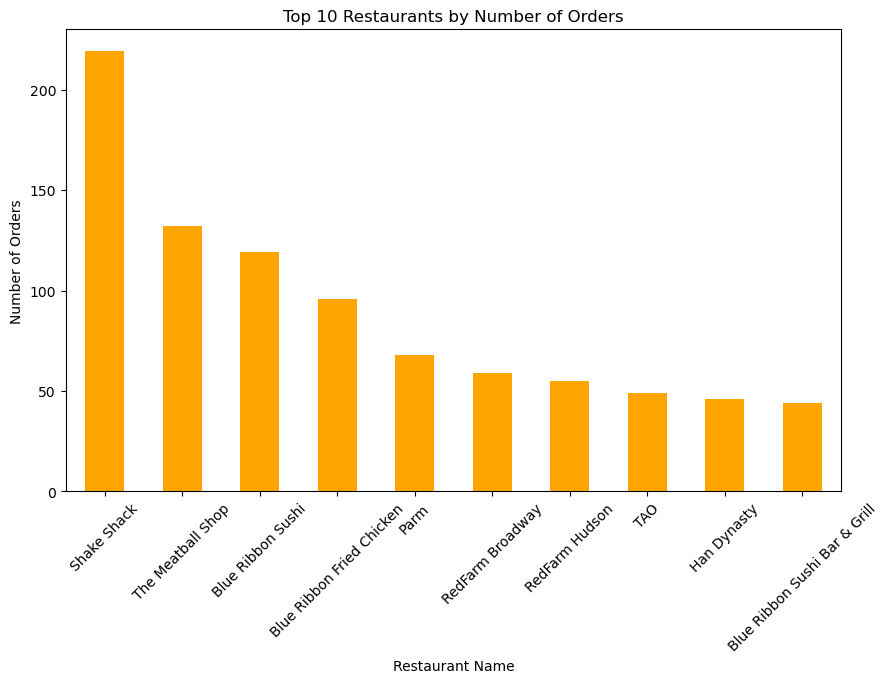

In [ ]:
# Find restaurant with the highest number of orders
top_restaurant_orders = Foodhub['restaurant_name'].value_counts().head(10)
print('Restaurant with the highest orders:\n', top_restaurant_orders)

# Bar plot
plt.figure(figsize=(10,6))
top_restaurant_orders.plot(kind='bar', color='orange')
plt.title('Top 10 Restaurants by Number of Orders')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### 4. Which cuisine type is the most popular?
Based on the visualization below, American cuisine is the most popular cuisine with a number of 584 orders.

Restaurant with the most popular cuisine type:
 cuisine_type
American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: count, dtype: int64


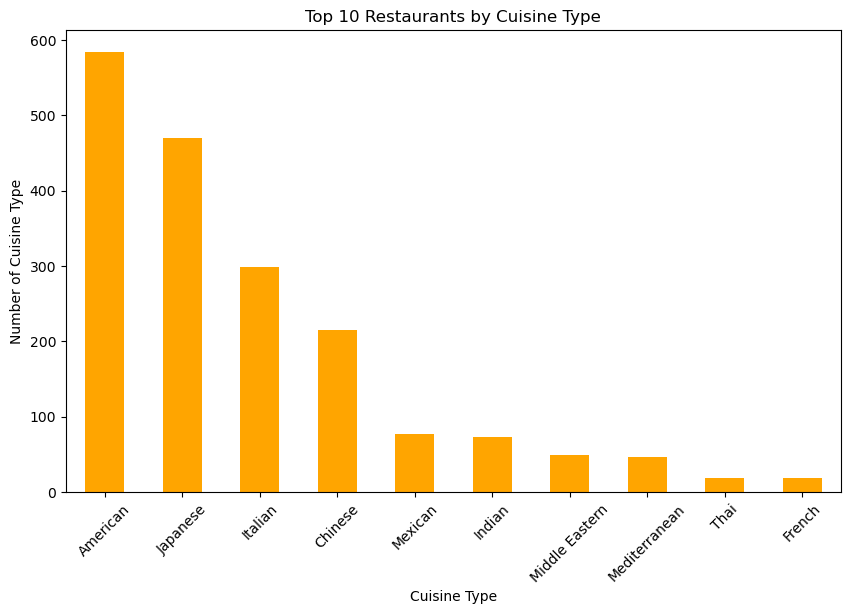

In [ ]:
# Find restaurant with the most popular cuisine type
popular_cuisine_type = Foodhub['cuisine_type'].value_counts().head(10)
print('Restaurant with the most popular cuisine type:\n', popular_cuisine_type)

# Bar plot
plt.figure(figsize=(10,6))
popular_cuisine_type.plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

### 5. How do orders differ between weekdays and weekends?
Based on the visualization, more than double the orders happen on weekends.

Orders on Day Category:
 day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


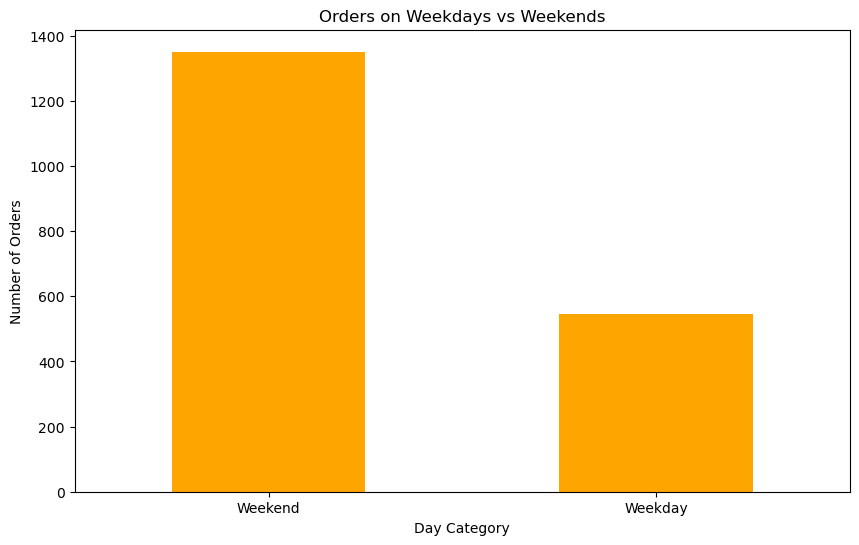

In [19]:
# Count orders by day of the week
orders_by_day = Foodhub['day_of_the_week'].value_counts().head(10)
print('Orders on Day Category:\n', orders_by_day)

# Bar plot
plt.figure(figsize=(10,6))
orders_by_day.plot(kind='bar', color='orange')
plt.title('Orders on Weekdays vs Weekends')
plt.xlabel('Day Category')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

### 6. What is the total revenue generated?
The total revenue generated from Foodhub restaurant is $31,314.82. 

In [23]:
# Calculate total revenue
total_revenue = Foodhub['cost_of_the_order'].sum().round(2)
print('Total Revenue Generated: $', total_revenue)

Total Revenue Generated: $ 31314.82


### 7. Which restaurant made the highest revenue?
Based on the visualization, Shake Shack is the restaurant with the highest revenue of $3579.53. 

Restaurant with the highest revenue generated: restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64


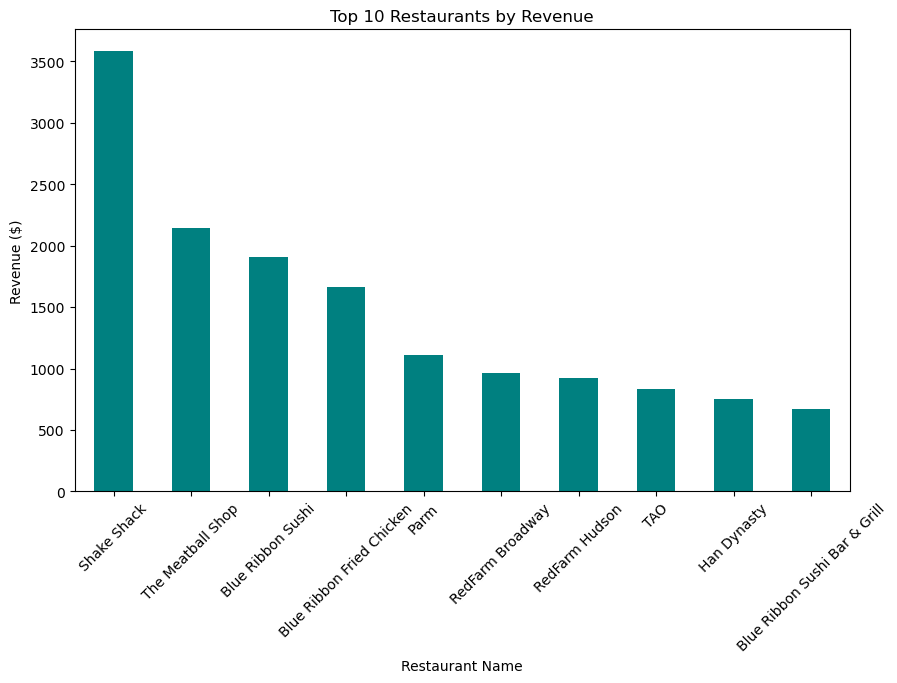

In [27]:
# Calculate restaurant with the highest revenue
restaurant_revenue = Foodhub.groupby('restaurant_name')['cost_of_the_order'].sum().sort_values(ascending=False).head(10).round(2)
print('Restaurant with the highest revenue generated:', restaurant_revenue)

# Bar plot
plt.figure(figsize=(10,6))
restaurant_revenue.plot(kind='bar', color='teal')
plt.title('Top 10 Restaurants by Revenue')
plt.xlabel('Restaurant Name')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

### 8. Which cuisine type generated the highest average revenue?
Based on the visualization, French cuisine is the highest average revenue generated with $19.79 per order.

Cuisine Type with the highest average revenue generated: cuisine_type
French            19.79
Southern          19.30
Thai              19.21
Spanish           18.99
Middle Eastern    18.82
Mexican           16.93
Indian            16.92
Italian           16.42
American          16.32
Chinese           16.31
Name: cost_of_the_order, dtype: float64


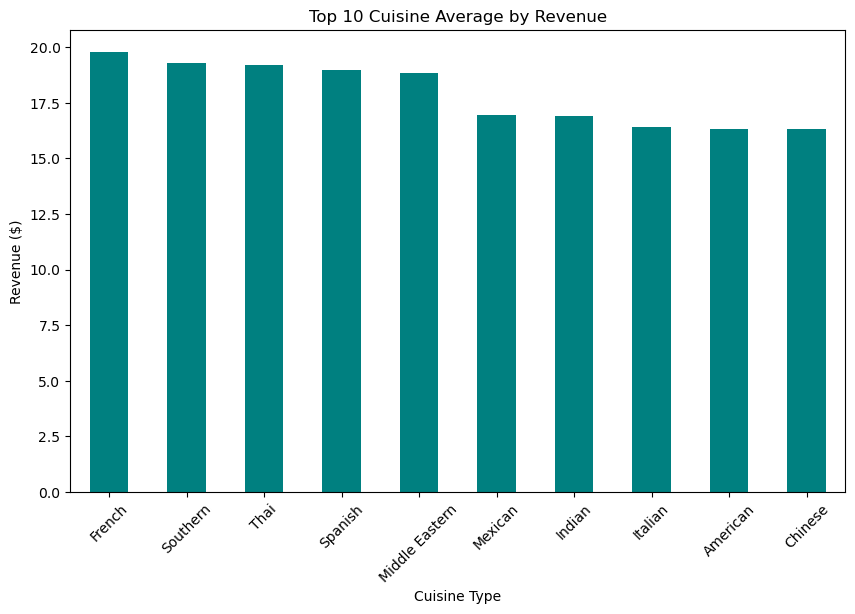

In [29]:
# Calculate cuisine type with the highest average revenue
cuisine_revenue = Foodhub.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False).head(10).round(2)
print('Cuisine Type with the highest average revenue generated:', cuisine_revenue)

# Bar plot
plt.figure(figsize=(10,6))
cuisine_revenue.plot(kind='bar', color='teal')
plt.title('Top 10 Cuisine Average by Revenue')
plt.xlabel('Cuisine Type')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

### 9. What is the distribution of ratings (1–5, Not given)?
Based on the visualization, the rating distribution consists of Not given, 5 stars, 4 stars and 3 stars ratings with the number of orders 736, 588, 386 and 188 respectively. Many customers do not leave ratings.

Rating Distribution:
 rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64


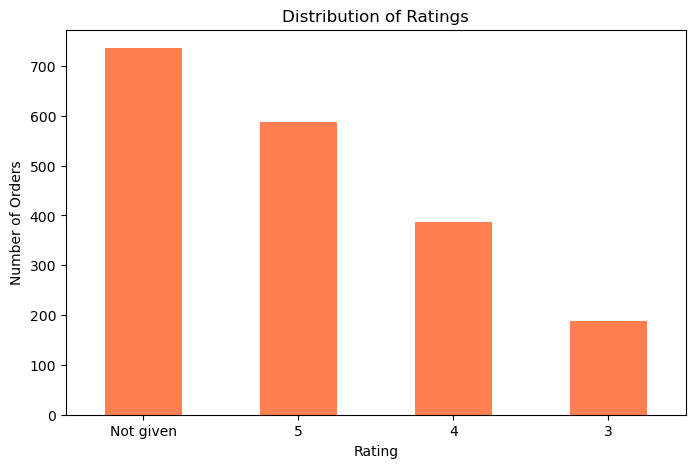

In [30]:
# Distribution of ratings
rating_distribution = Foodhub['rating'].value_counts()
print('Rating Distribution:\n', rating_distribution)

# Bar plot
plt.figure(figsize=(8,5))
rating_distribution.plot(kind='bar', color='coral')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()

### 10. Do weekend orders have higher ratings compared to weekdays?
Based on the visualization below, Weekend orders slightly have higher ratings compared to weekdays. 

Average Ratings (Weekend vs Weekday):
 day_of_the_week
Weekday    4.31
Weekend    4.36
Name: rating, dtype: float64


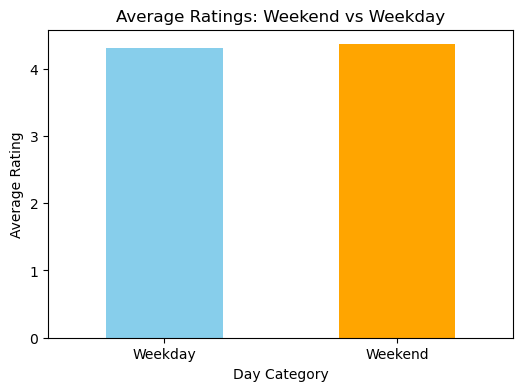

In [33]:
# Remove "Not given" ratings
valid_ratings = Foodhub[Foodhub['rating'] != 'Not given'].copy()

# Convert ratings to numeric
valid_ratings['rating'] = pd.to_numeric(valid_ratings['rating'], errors='coerce')

# Calculate average rating by day category
avg_rating_by_day = valid_ratings.groupby('day_of_the_week')['rating'].mean().round(2)
print('Average Ratings (Weekend vs Weekday):\n', avg_rating_by_day)

# Bar plot
plt.figure(figsize=(6,4))
avg_rating_by_day.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Ratings: Weekend vs Weekday')
plt.xlabel('Day Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

### 11. What is the average food preparation time across all restaurants?
The average food preparation time across all restaurant is given as 27.37 minutes.

In [49]:
# Average food preparation time
avg_prep_time = Foodhub['food_preparation_time'].mean().round(2)
print('Average Food Preparation Time:', avg_prep_time, 'minutes')

Average Food Preparation Time: 27.37 minutes


### 12. What is the average delivery time across all restaurants?
The average delivery time across all restaurants is given as 24.16 minutes.

In [50]:
# Average delivery time
avg_delivery_time = Foodhub['delivery_time'].mean().round(2)
print('Average Delivery Time:', avg_delivery_time, 'minutes')

Average Delivery Time: 24.16 minutes


### 13. Which restaurant has the fastest delivery time on average?
Based on the visualization below, Gaia Italian Cafe is the fastest delivery restaurant that delivers within 15 minutes.

Fastest Delivery Restaurant: restaurant_name
Gaia Italian Cafe    15.0
Paul & Jimmy's       15.0
The MasalaWala       15.0
Hibino               15.0
Coppola's East       16.0
Galli Restaurant     16.0
Wo Hop Restaurant    16.0
Market Table         17.0
Byblos Restaurant    18.0
Samurai Mama         18.0
Name: delivery_time, dtype: float64


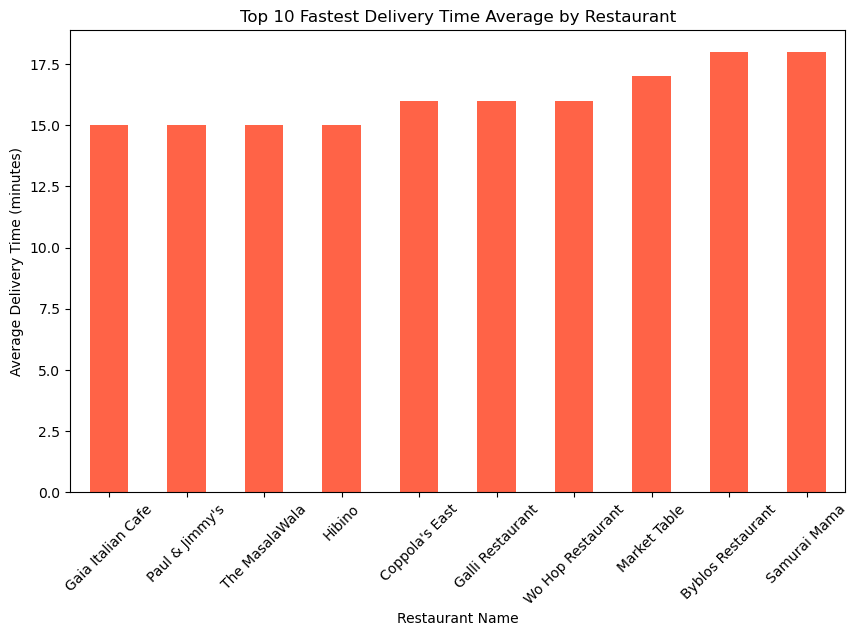

In [56]:
# Restaurant with the fastest delivery time on average
fast_delivery = Foodhub.groupby('restaurant_name')['delivery_time'].mean().sort_values().head(10)
print('Fastest Delivery Restaurant:', fast_delivery)

# Bar plot
plt.figure(figsize=(10,6))
fast_delivery.plot(kind='bar', color='tomato')
plt.title('Top 10 Fastest Delivery Time Average by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Delivery Time (minutes)')
plt.xticks(rotation=45)
plt.show()

### 14. Does a higher food preparation time lead to lower customer ratings?
Based on the visualization below, the correlation between food preparation time and rating is given as -0.0061. This showcase almost no relationship which signifies that longer preparation time does not strongly affect ratings. 

                       cost_of_the_order  food_preparation_time  \
cost_of_the_order               1.000000               0.035445   
food_preparation_time           0.035445               1.000000   
delivery_time                  -0.075892              -0.008635   
rating                          0.033983              -0.006083   

                       delivery_time    rating  
cost_of_the_order          -0.075892  0.033983  
food_preparation_time      -0.008635 -0.006083  
delivery_time               1.000000 -0.009804  
rating                     -0.009804  1.000000  


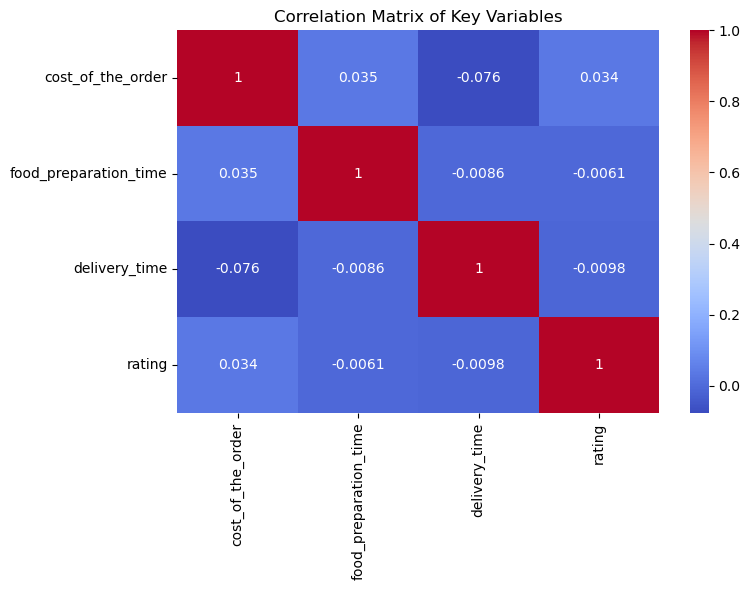

In [60]:
# Remove "Not given" ratings
valid_ratings = Foodhub[Foodhub['rating'] != 'Not given'].copy()

# Convert ratings to numeric
valid_ratings['rating'] = pd.to_numeric(valid_ratings['rating'], errors='coerce')

# Select only numeric columns for correlation analysis
numeric_cols = valid_ratings[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']]

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

print(correlation_matrix)

# Scatter plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()

### 15. Which day of the week generates the most revenue?
Based on the visualization below, Weekend generates the most with a $22,392.60 revenue generated. 

Revenue by Day of the Week:
 day_of_the_week
Weekend    22392.60
Weekday     8922.22
Name: cost_of_the_order, dtype: float64


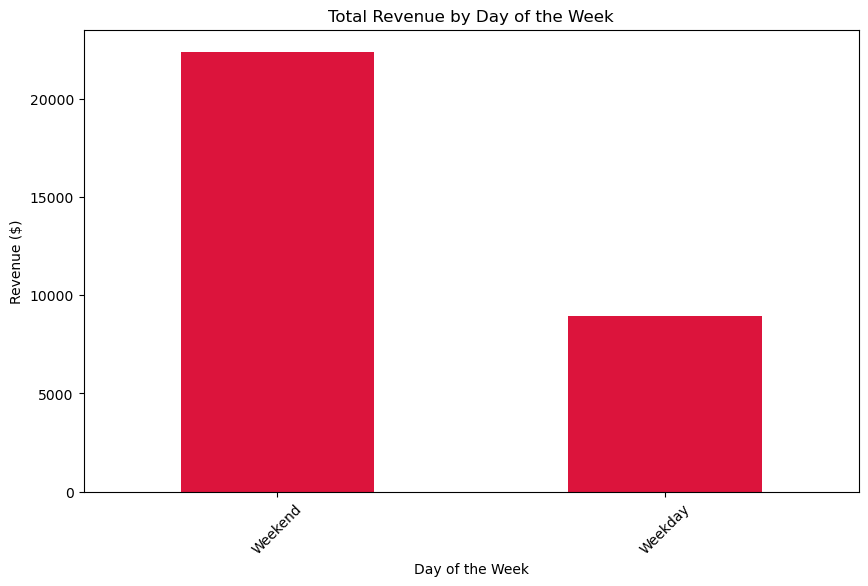

In [64]:
# Calculate revenue per day of the week
revenue_per_day = Foodhub.groupby('day_of_the_week')['cost_of_the_order'].sum().sort_values(ascending=False)

# Print results
print('Revenue by Day of the Week:\n', revenue_per_day)

# Bar plot
plt.figure(figsize=(10,6))
revenue_per_day.plot(kind='bar', color='crimson')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

# ACT
## INSIGHTS

1. Shake Shack restaurant dominates in both orders and revenue.
2. American cuisine is the most popular, but French cuisine brings in higher value per order.
3. Weekends are the busiest (more than double the weekday orders).
4. Many customers don’t leave ratings (which could hide valuable feedback).
5. On average, preparation times are reasonable, but some restaurants take longer than others.
6. Delivery times may vary depending on order value, restaurant, or day of the week.
7. Preparation time does not affect ratings significantly.
8. Weekends generate higher revenue and higher average order costs than weekdays.
9. Some restaurants consistently charge higher average order costs than others.
10. Some highly rated restaurants earn less revenue.

## RECOMMENDATIONS

1. Since weekends or specific weekdays bring higher sales, FoodHub can ensure more delivery staff are available on high-demand days to reduce delays.
2. Foodhub should promote high revenue cuisines by suggesting related dishes to customers when they order a trending cuisine.
3. Foodhub should support smaller or underrated restaurants by giving more visibility to restaurants that have high ratings but low sales.
4. Foodhub should identify restaurants with longer preparation time and provide training or tech support.
5. Foodhub should help premium restaurants run limited-time discounts to attract more customers.

In general, FoodHub can grow by keeping loyal customers happy, improving slow restaurants, promoting popular cuisines, and making delivery faster. By encouraging customers to leave ratings and using personalized promotions, FoodHub will increase both customer satisfaction and revenue.

## CONCLUSION

The dataset shows that a few customers, restaurants, and cuisines drive most of the business. Certain days bring in higher sales, and while many people rate their orders, quite a few skip ratings. FoodHub can increase profits by focusing on loyal customers, promoting high-revenue cuisines, and improving slower restaurants.
